In [27]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('4000diseases.csv')

In [3]:
df.head(50)

,id,factid,fact,description
0,14,5,Causes,It is believed that the mutation of the gene C...
1,15,1,Definition,46 Gonadal dysgenesis epibulbar dermoid can be...
2,15,2,Diagnosis,Since the streak gonads are unable to develop ...
3,15,3,Treatment,Most estrogen hormonal treatments are now bein...
4,15,4,Pathogenesis,"Up to this point, this abnormality does not ha..."
5,16,1,Definition,47 XXY syndrome is popularly known as the Klin...
6,16,2,Frequency,"Approximately 1 in every 500 to 1,000 males su..."
7,16,3,Diagnosis,"To confirm diagnoses of XXY syndrome, karyotyp..."
8,16,4,Treatment,Testosterone treatment could not alter the gen...
9,16,5,Symptoms and Signs,"More often than not, the patients become steri..."


In [4]:
df.shape

(17667, 4)

In [5]:
# Pivot the DataFrame to get 'fact' values as column headers
pivoted_df = df.pivot(index='id', columns='fact', values='description').reset_index()

# Some post-processing to handle possible duplicates and ensure data integrity
# You may need to customize the aggregation function as per your data requirements
# For simplicity, we're joining the entries with a semicolon in case of duplicates
pivoted_df = pivoted_df.groupby('id').agg(lambda x: '; '.join(x.dropna())).reset_index()

# The above pivot may create NaN values for facts that are not present for all 'id',
# so we replace NaN with an empty string if needed
#df = pivoted_df.fillna('')


In [6]:
print(list(pivoted_df.columns))

['id', 'Appearance', 'Care', 'Case Study', 'Cases', 'Causative Organism', 'Cause and Diagnosis', 'Causes', 'Characteristics and Features', 'Classifications', 'Clinical Features', 'Clinical Phenotypes of AMD', 'Clinical Trials', 'Clinical presentation', 'Common Symptoms', 'Complications', 'Components', 'Conclusion', 'Definition', 'Developmental Delays', 'Diagnosis', 'Diagnosis and Treatments', 'Diet', 'Diseases Associated with the Deficiency', 'Diseases that are Associated with Acquired Ichthyosis', 'Divisions of Lifespan', 'Ecology and Aphiphobia', 'Education', 'Effects', 'Endocrine Treatment', 'Epidemiology', 'Etiology', 'Etymology', 'Examples', 'Eye Problems caused by the Syndrome', 'Findings', 'First Recorded Case', 'Frequency', 'Function', 'Genetic prevalence', 'Genetics', 'HIV Stages of Infection', 'Histology', 'Histopathology', 'Historical Background', 'Hormonal Conditions with the Deficiency', 'Implications', 'Incubation period', 'Infection cycle', 'Inheritance', 'Introduction',

In [17]:
# Assuming df is your dataframe and 'Symptoms and Signs' is the column you are cleaning.
pivoted_df['Definition'] = pivoted_df['Definition'].replace(r'^\s*$', np.nan, regex=True)

In [18]:
pivoted_df['Definition'].isna().sum()

0

In [9]:
# Assuming df is your dataframe and 'Symptoms and Signs' is the column you are cleaning.
pivoted_df['Symptoms and Signs'] = pivoted_df['Symptoms and Signs'].replace(r'^\s*$', np.nan, regex=True)

In [10]:
pivoted_df['Symptoms and Signs'].isna().sum()

472

In [11]:
pivoted_df['Symptoms and Signs'][pivoted_df['Symptoms and Signs'].notna()].head(20)

9     With the onset of the deficiency, various symp...
11    The distinct traits of Type I include delay in...
12    Glaucoma is a very common symptom of 3C syndro...
13    The major symptoms of 3M syndrome are dwarfism...
15    More often than not, the patients become steri...
17    There are various characteristics that point t...
22    Symptoms of this disorder could include: a mil...
23    Some of the most common traits that can be fou...
24    Among the symptoms of the disorder include pal...
25    A person who is observed to be presenting symp...
27    Aneurysms do not develop overnight. In fact, t...
28    Symptoms of the condition may vary. These symp...
31                Abdominal pain itself is the symptom.
34    The signs of the disorder include failure to t...
37    The cardinal symptoms and signs of any kind of...
38    Classic signs of Bartholin's abscess include: ...
39    Symptoms of absence seizures include lip smack...
43    Infectious symptoms include itchy, red ski

In [12]:
def generate_wordcloud_from_symptoms(symptom_counts):
    """
    Generates and displays a word cloud based on symptom frequencies.
    
    Args:
    - symptom_counts (pd.Series): A series where the index is the symptom names and the values are their counts.
    
    Returns:
    - None: Displays the word cloud.
    """
    
    # Generate the word cloud using the symptom counts
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(symptom_counts)

    # Plot the word cloud image
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [19]:
df = pd.DataFrame({"patient_id": pivoted_df.id,
                   "diagnosis": pivoted_df.Definition,
 "signs_and_symptoms": pivoted_df['Symptoms and Signs']
    })

In [20]:
df.shape

(3962, 3)

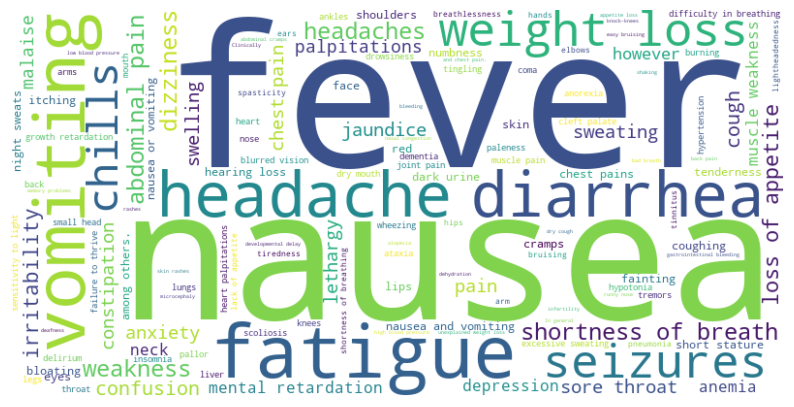

In [21]:
# This assumes each entry in the series is a string of symptoms separated by commas
symptom_series = df['signs_and_symptoms'].dropna().astype(str)

# Split each string on the comma and then flatten the list
symptoms_list = symptom_series.str.split(',').explode()

# Use Counter to create a dictionary of symptom frequencies
symptom_counts = Counter(symptoms_list)

# Now you can generate the word cloud with this dictionary
generate_wordcloud_from_symptoms(symptom_counts)

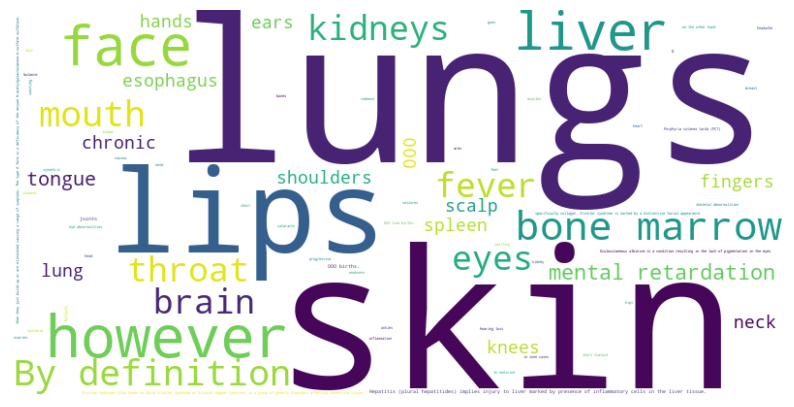

In [22]:
# This assumes each entry in the series is a string of symptoms separated by commas
symptom_series = df['diagnosis'].dropna().astype(str)

# Split each string on the comma and then flatten the list
symptoms_list = symptom_series.str.split(',').explode()

# Use Counter to create a dictionary of symptom frequencies
symptom_counts = Counter(symptoms_list)

# Now you can generate the word cloud with this dictionary
generate_wordcloud_from_symptoms(symptom_counts)

In [26]:
df.head()

,patient_id,diagnosis,signs_and_symptoms
0,1,It is important to understand what congenital ...,NaN
1,2,11Beta-hydroxysteroid dehydrogenase type 2 def...,NaN
2,3,17 Alpha hydroxylase deficiency syndrome is a ...,NaN
3,4,The hormones estrogen and androgen play critic...,NaN
4,5,1p36 deletion syndrome also known as monosomy ...,NaN


In [32]:
# This pattern tries to match any text up to the first occurrence of a phrase that looks like a description.
pattern = re.compile(r'^(?P<disease_name>[\w\s-]+)(?=\b(?:syndrome|deficiency|disease|disorder|condition|anomaly|neurologic|abscess)\b)')

# Extract disease names using the pattern
df['disease_name'] = df['diagnosis'].apply(lambda x: pattern.search(x)['disease_name'].strip() if pattern.search(x) else '')

In [34]:
# Assuming df is your dataframe and 'Symptoms and Signs' is the column you are cleaning.
df['disease_name'] = df['disease_name'].replace(r'^\s*$', np.nan, regex=True)

In [41]:
df.diagnosis.head(50)

0     It is important to understand what congenital ...
1     11Beta-hydroxysteroid dehydrogenase type 2 def...
2     17 Alpha hydroxylase deficiency syndrome is a ...
3     The hormones estrogen and androgen play critic...
4     1p36 deletion syndrome also known as monosomy ...
5     21-hydroxylase deficiency is also called as co...
6     The disorder known as 22q11.2 deletion syndrom...
7     3-Beta-hydroxysteroid dehydrogenase deficiency...
8     The enzyme called 3-Methyl Glutaconyl-CoA Hydr...
9     LCHAD or the long-chain 3-hydroxyacyl-CoA dehy...
10    3-Methylcrotonyl-CoA carboxylase deficiency is...
11    3-Methylglutaconic aciduria also known as MGA ...
12    3C syndrome is also known as cranio-cerebello ...
13    3M syndrome is known by many names. It can als...
14    46 Gonadal dysgenesis epibulbar dermoid can be...
15    47 XXY syndrome is popularly known as the Klin...
16    The XYY syndrome should never be interchanged ...
17    48 XXXX syndrome is a very rare disorder o

In [43]:
df.signs_and_symptoms.isna().sum()

472